Delhi Capitals : players analysis

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import ndcg_score

In [2]:
df1 = pd.read_csv("dc_batting_2024_players_records.csv")
df2 = pd.read_csv("dc_bowling_2024_players_records.csv")

# Merge the DataFrames on the 'Player' column, using an outer join
merged_df = pd.merge(df1, df2, on='Player', how='outer')

# Fill NaN values with 0
merged_df.fillna(0, inplace=True)

# Display the merged DataFrame
print(merged_df)

    POS_x                    Player  Runs_x  Mat_x  Inns_x   NO   HS  Avg_x  \
0    30.0         Abishek Porel  DC   327.0   14.0    12.0  2.0   65   32.7   
1   145.0         Anrich Nortje  DC     4.0    6.0     2.0  0.0    4      2   
2    43.0            Axar Patel  DC   235.0   14.0    12.0  4.0   66  29.38   
3    60.0          David Warner  DC   168.0    8.0     8.0  0.0   52     21   
4   115.0         Gulbadin Naib  DC    19.0    2.0     1.0  0.0   19     19   
5   167.0         Ishant Sharma  DC     1.0    9.0     2.0  2.0   1*      -   
6    29.0  Jake Fraser - McGurk  DC   330.0    9.0     9.0  0.0   84  36.67   
7   154.0       Jhye Richardson  DC     2.0    1.0     1.0  0.0    2      2   
8     0.0         Khaleel Ahmed  DC     0.0    0.0     0.0  0.0    0      0   
9    93.0         Kuldeep Yadav  DC    47.0   11.0     5.0  2.0  35*  15.67   
10  149.0        Kumar Kushagra  DC     3.0    4.0     3.0  0.0    2      1   
11  131.0           Lalit Yadav  DC    10.0    2.0  

In [3]:
data = pd.read_csv("delhi_data_2024.csv")

In [4]:
data.head()

,Player,Runs_scored,Matches_played,Inns_batted,Notout,HS,Batting_avg,Balls_faced,batting_strikerate,100,...,POS_y,Wickets_taken,Inns_bowled,Overas_bowled,Runs_given,Bowling_avg,Bowling_economy,Bowling_strikerate,4w,5w
0,Rishabh Pant DC,446,13,13,2,88,40.55,287,155.40,0,...,0,0,0,0.0,0,0.00,0.00,0.0,0,0
1,Tristan Stubbs DC,378,14,13,6,71,54.00,198,190.90,0,...,72,3,2,2.0,15,5.00,7.50,4.0,0,0
2,Jake Fraser - McGurk DC,330,9,9,0,84,36.67,141,234.04,0,...,0,0,0,0.0,0,0.00,0.00,0.0,0,0
3,Abishek Porel DC,327,14,12,2,65,32.70,205,159.51,0,...,0,0,0,0.0,0,0.00,0.00,0.0,0,0
4,Axar Patel DC,235,14,12,4,66,29.38,179,131.28,0,...,28,11,14,44.0,337,30.63,7.65,24.0,0,0


In [5]:
# calculate the averages
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player              22 non-null     object 
 1   Runs_scored         22 non-null     int64  
 2   Matches_played      22 non-null     int64  
 3   Inns_batted         22 non-null     int64  
 4   Notout              22 non-null     int64  
 5   HS                  22 non-null     int64  
 6   Batting_avg         22 non-null     float64
 7   Balls_faced         22 non-null     int64  
 8   batting_strikerate  22 non-null     float64
 9   100                 22 non-null     int64  
 10  50                  22 non-null     int64  
 11  4s                  22 non-null     int64  
 12  6s                  22 non-null     int64  
 13  POS_y               22 non-null     int64  
 14  Wickets_taken       22 non-null     int64  
 15  Inns_bowled         22 non-null     int64  
 16  Overas_bow

In [6]:
# players taken atleast 1 wicket
players_with_wickets = data[data['Wickets_taken'] >= 1]


In [22]:
# Players scored atleast 100 runs

players_with_runs = data[data['Runs_scored'] >= 1]

In [23]:
print("average runs scored",players_with_runs['Runs_scored'].mean())
print("average batting strikerate",players_with_runs['batting_strikerate'].mean())
print("average wickets taken",players_with_wickets['Wickets_taken'].mean())
print("average bowling economy",players_with_wickets['Bowling_economy'].mean())

average runs scored 117.38095238095238
average batting strikerate 109.35333333333334
average wickets taken 9.2
average bowling economy 10.279


In [9]:
# Ranking for Batsman
# Apply constraints: At least 100 runs and a strike rate of at least 120
filtered_df = data[(data['Runs_scored'] >= 100) & (data['batting_strikerate'] >= 120)]

rank = [1, 2, 3, 4, 5, 6, 7,8]
filtered_df['Batting_avg'] = pd.to_numeric(filtered_df['Batting_avg'], errors='coerce')


C:\Users\niran\AppData\Local\Temp\ipykernel_28248\2970087007.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Batting_avg'] = pd.to_numeric(filtered_df['Batting_avg'], errors='coerce')


In [10]:
# Features and target
X = filtered_df[['Runs_scored', 'Matches_played', 'Batting_avg', 'HS','batting_strikerate']]
y = rank

                    Runs_scored  Matches_played  Batting_avg        HS  \
Runs_scored            1.000000        0.642629     0.853177  0.819919   
Matches_played         0.642629        1.000000     0.642183  0.363361   
Batting_avg            0.853177        0.642183     1.000000  0.645513   
HS                     0.819919        0.363361     0.645513  1.000000   
batting_strikerate     0.446297       -0.106484     0.536972  0.546849   

                    batting_strikerate  
Runs_scored                   0.446297  
Matches_played               -0.106484  
Batting_avg                   0.536972  
HS                            0.546849  
batting_strikerate            1.000000  


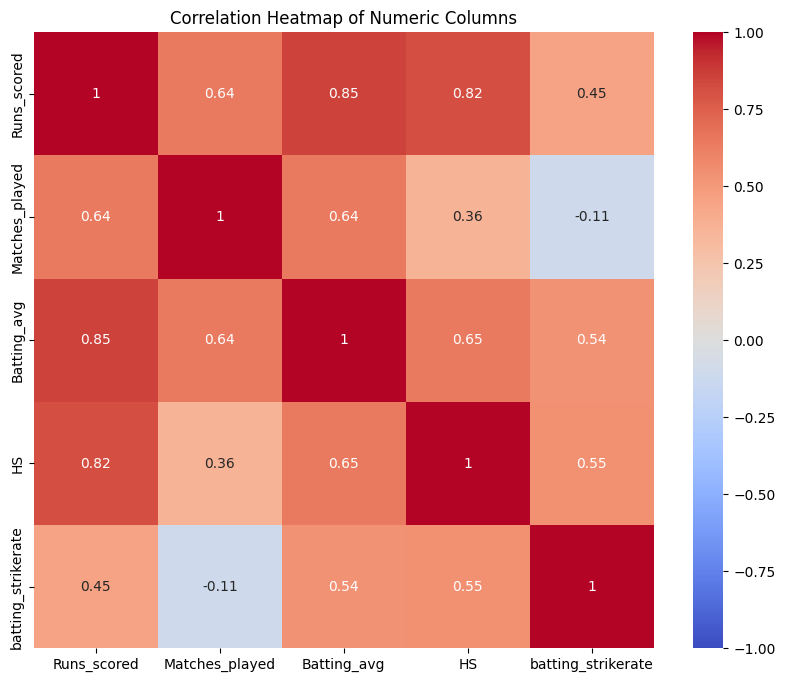

In [11]:
# Calculate correlation matrix
correlation_matrix = X.corr()

# Print correlation matrix
print(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [12]:
# Apply constraints: At least 100 runs and a strike rate of at least 120
filtered_df = X[(X['Runs_scored'] >= 100) & (X['batting_strikerate'] >= 120)]

In [13]:
# Simple ranking based on Runs scored and Wickets taken
filtered_df['Rank'] = filtered_df['Runs_scored'].rank(ascending=False) + filtered_df['batting_strikerate'].rank(ascending=False) * 0.01

In [14]:
ranked_df = filtered_df.sort_values(by='Rank')

In [15]:
ranked_df.head()


,Runs_scored,Matches_played,Batting_avg,HS,batting_strikerate,Rank
0,446,13,40.55,88,155.40,1.05
1,378,14,54.00,71,190.90,2.02
2,330,9,36.67,84,234.04,3.01
3,327,14,32.70,65,159.51,4.04
4,235,14,29.38,66,131.28,5.08


To scale cricket players out of 100 while considering both batsmen and bowlers, you can use a composite scoring system that accounts for both batting and bowling performances. Here's a step-by-step approach to achieve this:
Steps to Scale Players
Identify Key Metrics:
For batsmen: Runs scored, batting average, and strike rate.
For bowlers: Wickets taken, bowling average, and economy rate.
Normalize Each Metric:
Normalize each player's performance metric to a scale of 0 to 1. This can be done using the formula:
Normalized Score
=
Player s Score
−
Min Score
Max Score
−
Min Score
Normalized Score= 
Max Score−Min Score
Player s Score−Min Score
​
 
Apply this to each metric for all players.
Weight the Metrics:
Assign weights to each metric based on its importance. For example, runs and wickets might have higher weights compared to strike rate and economy rate.
Calculate Composite Score:
For batsmen: Combine the normalized scores of runs, batting average, and strike rate using the assigned weights.
For bowlers: Combine the normalized scores of wickets, bowling average, and economy rate similarly.
Scale to 100:
Multiply the composite score by 100 to scale it to a range of 0 to 100.
Combine Scores for All-rounders:
For players who contribute both as batsmen and bowlers, calculate a combined score by averaging their batting and bowling composite scores.

In [16]:
print(data.dtypes)

Player                 object
Runs_scored             int64
Matches_played          int64
Inns_batted             int64
Notout                  int64
HS                      int64
Batting_avg           float64
Balls_faced             int64
batting_strikerate    float64
100                     int64
50                      int64
4s                      int64
6s                      int64
POS_y                   int64
Wickets_taken           int64
Inns_bowled             int64
Overas_bowled         float64
Runs_given              int64
Bowling_avg           float64
Bowling_economy       float64
Bowling_strikerate    float64
4w                      int64
5w                      int64
dtype: object


In [17]:
data['Batting_avg'] = data['Batting_avg'].astype(float)

In [18]:
df = data

In [24]:
# Normalize metrics
for metric in ['Runs_scored', 'Batting_avg', 'batting_strikerate', 'Wickets_taken']:
    df[f'{metric}_norm'] = (df[metric] - df[metric].min()) / (df[metric].max() - df[metric].min())

# Normalize economy rate (lower is better)
df['Bowling_economy_norm'] = 1 - (df['Bowling_economy'] - df['Bowling_economy'].min()) / (df['Bowling_economy'].max() - df['Bowling_economy'].min())

# Assign weights
batting_weights = {
    'Runs_scored_norm': 0.4,
    'Batting_avg_norm': 0.3,
    'batting_strikerate_norm': 0.3
}

bowling_weights = {
    'Wickets_taken_norm': 0.6,
    'Bowling_economy_norm': 0.4
}

# Determine player type
def determine_player_type(row):
    if row['Runs_scored'] > 100 and row['Wickets_taken'] <= 2 and row['Balls_faced'] > 40:
        return 'Batsman'
    elif row['Wickets_taken'] > 5 and row['Runs_scored'] < 100:
        return 'Bowler'
    elif row['Wickets_taken'] >= 3 and row['Runs_scored'] > 100:
        return 'All-rounder'
    return 'Other Players'

df['Player_type'] = df.apply(determine_player_type, axis=1)

# Calculate scores based on player type
def calculate_score(row):
    if row['Player_type'] == 'Batsman':
        return (
            row['Runs_scored_norm'] * batting_weights['Runs_scored_norm'] +
            row['Batting_avg_norm'] * batting_weights['Batting_avg_norm'] +
            row['batting_strikerate_norm'] * batting_weights['batting_strikerate_norm']
        ) * 100
    elif row['Player_type'] == 'Bowler':
        return (
            row['Wickets_taken_norm'] * bowling_weights['Wickets_taken_norm'] +
            row['Bowling_economy_norm'] * bowling_weights['Bowling_economy_norm']
        ) * 100
    elif row['Player_type'] == 'All-rounder':
        batting_score = (
            row['Runs_scored_norm'] * batting_weights['Runs_scored_norm'] +
            row['Batting_avg_norm'] * batting_weights['Batting_avg_norm'] +
            row['batting_strikerate_norm'] * batting_weights['batting_strikerate_norm']
        ) * 100
        bowling_score = (
            row['Wickets_taken_norm'] * bowling_weights['Wickets_taken_norm'] +
            row['Bowling_economy_norm'] * bowling_weights['Bowling_economy_norm']
        ) * 100
        return (batting_score + bowling_score) / 2
    return 0

df['Overall_score'] = df.apply(calculate_score, axis=1)

print(df[['Player', 'Player_type', 'Overall_score']])

                      Player    Player_type  Overall_score
0           Rishabh Pant  DC        Batsman      82.447450
1         Tristan Stubbs  DC    All-rounder      58.252333
2   Jake Fraser - McGurk  DC        Batsman      79.968635
3          Abishek Porel  DC        Batsman      67.940526
4             Axar Patel  DC    All-rounder      55.072843
5           Prithvi Shaw  DC        Batsman      52.482467
6              Shai Hope  DC        Batsman      48.351150
7           David Warner  DC        Batsman      43.961756
8         Mitchell Marsh  DC  Other Players       0.000000
9          Kuldeep Yadav  DC         Bowler      70.452624
10          Rasikh Salam  DC         Bowler      38.920395
11         Gulbadin Naib  DC  Other Players       0.000000
12           Sumit Kumar  DC  Other Players       0.000000
13           Lalit Yadav  DC  Other Players       0.000000
14         Anrich Nortje  DC         Bowler      24.705882
15          Mukesh Kumar  DC         Bowler      68.9820

Explanation:
Normalization
Each performance metric is normalized to a scale of 0 to 1. This allows us to compare different metrics on the same scale.
    'Wickets_taken': [0, 14, 11],
    'Bowling_economy': [0, 10.36, 7.65]
}
df = pd.DataFrame(data)

Normalization
Each performance metric is normalized to a scale of 0 to 1. This allows us to compare different metrics on the same scale.
python
for metric in ['Runs_scored', 'Batting_avg', 'batting_strikerate', 'Wickets_taken']:
    df[f'{metric}_norm'] = (df[metric] - df[metric].min()) / (df[metric].max() - df[metric].min())

# Normalize economy rate (lower is better)
df['Bowling_economy_norm'] = 1 - (df['Bowling_economy'] - df['Bowling_economy'].min()) / (df['Bowling_economy'].max() - df['Bowling_economy'].min())

Normalization Formula: For metrics where a higher value is better (e.g., runs scored), we use the formula:
Normalized Score = Players Score − Min Score /Max score - min Score


Economy Rate: Since a lower economy rate is better, we subtract the normalized value from 1.

Player Categorization
Players are categorized as batsmen, bowlers, or all-rounders based on specific criteria.

Batsman: More than 100 runs and 2 or fewer wickets.
Bowler: More than 5 wickets and less than 100 runs.
All-rounder: More than 3 wickets and more than 100 runs.

Score Calculation
Scores are calculated based on the player's category, using the relevant metrics.
Batsman: The score is calculated using batting metrics only.
Bowler: The score is calculated using bowling metrics only.
All-rounder: Both batting and bowling scores are calculated and averaged.

This approach ensures that players are evaluated based on their primary contributions, considering their roles and performance metrics.

In [20]:
# df.to_csv("Score.csv")

 here are some machine learning models and approaches that can be used for player performance prediction and evaluation in sports:
Tree-Based Models:
Extra Trees, Random Forest, and Decision Tree: These models are highly effective for forecasting player performance metrics. They are particularly good at handling complex datasets with multiple features and interactions.
Linear-Based Models:
LARS (Least Angle Regression), LASSO (Least Absolute Shrinkage and Selection Operator), and Elastic Net: These models are useful for feature selection and handling high-dimensional data, which can be beneficial when evaluating player performance based on numerous statistics.
Gradient Boosting Models:
GBM (Gradient Boosting Machine) and LGBM (Light Gradient Boosting Machine): These models are powerful for prediction tasks and have shown significant improvement in forecasting player performance on unseen data.
K-Nearest Neighbors (KNN):
KNN can be used for classification tasks, such as categorizing players based on their performance metrics or predicting player roles.
Bayesian Regression (BR) and AdaBoost (AB):
These models can be applied for regression tasks to predict continuous outcomes like player scores or market values.
Multi-Criteria Decision-Making Models:
These models combine machine learning with decision-making frameworks to evaluate player performance and selection by considering multiple criteria, including sporting and financial aspects.
Machine Learning for Player Valuation:
Models that analyze player attributes, performance statistics, and market factors to predict player value and salary, providing insights into the economic aspects of player performance.
These models and approaches leverage machine learning algorithms to analyze player data, identify patterns, and make predictions about future performance, offering valuable insights for player evaluation, scouting, and strategic decision-making in sports.

In [27]:
# Sort the DataFrame by 'Overall_score' in descending order
sorted_df = df.sort_values(by="Overall_score", ascending=False)

# Display the player names and their overall scores
for index, row in sorted_df.iterrows():
    print(f"{row['Player']}, Overall Score: {row['Overall_score']}")

Rishabh Pant  DC, Overall Score: 82.44744962874343
Jake Fraser - McGurk  DC, Overall Score: 79.96863477827603
Khaleel Ahmed  DC, Overall Score: 71.31736526946108
Kuldeep Yadav  DC, Overall Score: 70.45262416343783
Mukesh Kumar  DC, Overall Score: 68.98203592814372
Abishek Porel  DC, Overall Score: 67.94052579771858
Tristan Stubbs  DC, Overall Score: 58.25233340176111
Axar Patel  DC, Overall Score: 55.07284293449849
Prithvi Shaw  DC, Overall Score: 52.482467256756536
Shai Hope  DC, Overall Score: 48.35114964654984
Ishant Sharma  DC, Overall Score: 45.92286016202888
David Warner  DC, Overall Score: 43.961755544195555
Rasikh Salam  DC, Overall Score: 38.920394505107424
Anrich Nortje  DC, Overall Score: 24.705882352941174
Ricky Bhui  DC, Overall Score: 0.0
Lizaad Williams  DC, Overall Score: 0.0
Jhye Richardson  DC, Overall Score: 0.0
Sumit Kumar  DC, Overall Score: 0.0
Kumar Kushagra  DC, Overall Score: 0.0
Lalit Yadav  DC, Overall Score: 0.0
Mitchell Marsh  DC, Overall Score: 0.0
Gulbadi